In [ ]:
First we choose packages we will be using

In [26]:

import matplotlib.pyplot as plt
import networkx as nx
import random


In [ ]:
Then we decide about coloring of series of percolated networks (series of networks uploaded from files or randomly generated)

In [4]:

print('Plot network with such weights on edges, which are proportional to time, when network is generated')

assign weight to edges, which are proportional to time, when network is generated


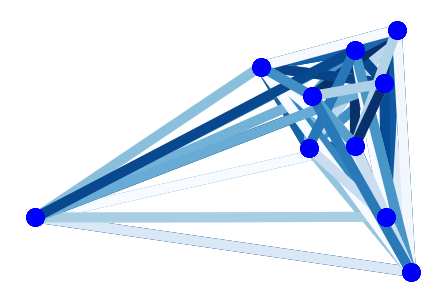

In [28]:

import matplotlib.pyplot as plt
import networkx as nx
import random

rand_scaling =  random.random() #scaling of the color of the edges        
Grand = nx.gnp_random_graph(10,0.3)
posrand = nx.spring_layout(Grand) #generate fixed network nodes layout

#assign colors to network links
for itime in range(1,10):
    G = nx.gnp_random_graph(10,0.3)

    for u,v,d in G.edges(data=True):
        d['weight'] = itime*random.random() # choose weight proportional to time of a network to appear
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    pos = nx.spring_layout(G) #all networks will have the same layout
    
    #pos = nx.spring_layout(G, fixed=G.nodes) #fix position of all nodes
    
    nx.draw(G, posrand, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)
plt.show()

In [ ]:
Now we also look at the percolation clusters using inspiration from both studies:
    1. https://www.nature.com/articles/s41598-019-44701-6 
    2. https://gist.github.com/cameronneylon/6033364

In [ ]:
import random, numpy, numpy.random, os, time
import NetGraphics
import MultiPlot, IntegerHistogram
pylab = MultiPlot.pylab


#TODO, to remove bugs from the adapated code

# ***** Start by reading the exercise "PercolationComputation.pdf"   ***** #
# ***** (and later "PercolationScaling.pdf") from Percolation.html   ***** #
# ***** in www.physics.cornell.edu/sethna/StatMech/ComputerExercises/***** #

# ***** Then define the general-purpose UndirectedGraph class        ***** #
# ***** using NetworksHints.py (renamed Networks.py), or import your ***** #
# ***** answers previously written for SmallWorldNetworks.           ***** #

# ***** Then return here to build some percolation networks          ***** #

# Import your network definitions
import Networks
reload(Networks) # for ipython %run to reload properly

# -----------------------------------------------------------------------
# Bond percolation on a square lattice
# -----------------------------------------------------------------------

def MakeSquareBondPercolation(L, p):
    """Instantiate empty graph g = Networks.UndirectedGraph()
    Add nodes on square grid using g.AddNode
    Add horizontal and vertical bonds to neighbors with probability
    p using g.AddEdge
    (1) random.random() will generate random float 0 <= r < 1,
        so "random.random() < p" is true with probability p
    (2) (i+1)%L will give periodic boundary conditions
    return g
    Check your answer using
    NetGraphics.DrawSquareNetworkBonds(g)
    """
    g = Networks.UndirectedGraph()
    for i in range(L):
        for j in range(L):
            g.AddNode((i,j))
            if random.random() < p:
                g.AddEdge((i,j), ((i+1)%L, j))
            if random.random() < p:
                g.AddEdge((i,j), (i, (j+1)%L))
    return g

# ***** After creating, displaying, and debugging your bond          ***** #
# ***** percolation networks, write the routines for finding         ***** #
# ***** clusters in Networks.py (put there because they are general) ***** #
# ***** and use the NetGraphics routines  below to plot the clusters ***** #
# ***** in different colors to aid debugging.                        ***** #

def PlotBondPercolationBonds(L=10, p=0.5, seed=1):
    """
    Uses DrawSquareNetworkBonds in NetGraphics to graph the percolation
    network made by MakeSquareBondPercolation and the clusters returned
    by Networks.FindAllClusters. Best for small networks to debug.
    """
    random.seed(seed)
    g = MakeSquareBondPercolation(L, p)
    cl = Networks.FindAllClusters(g)
    imfile = 'BondPercolation_%s_%s_%s.tif' % (L,p,seed)
    im = NetGraphics.DrawSquareNetworkBonds(g,cl,imfile=imfile)
    #iconfile = 'BondPercolationIcon_%s_%s_%s.jpg' % (L,p,seed)
    #imIcon = im.resize((96,96), Image.ANTIALIAS)
    #imIcon.save(iconfile)
    #display(iconfile)

def PlotBondPercolation(L=10, p=0.5, seed=1):
    """
    Uses DrawSquareNetworkSites in NetGraphics to graph the percolation
    network made by MakeSquareBondPercolation and the clusters returned
    by Networks.FindAllClusters. Best for large networks to explore
    universality.
    """
    random.seed(seed)
    g = MakeSquareBondPercolation(L, p)
    cl = Networks.FindAllClusters(g)
    imfile = 'BondPercolation_%s_%s_%s.tif' % (L,p,seed)
    im = NetGraphics.DrawSquareNetworkSites(g,cl,imfile=imfile)
    imfile = 'BondPercolationBiggest_%s_%s_%s.tif' % (L,p,seed)
    im = NetGraphics.DrawSquareNetworkSites(g,[cl[0]],imfile=imfile)
    #iconfile = 'BondPercolationIcon_%s_%s_%s.jpg' % (L,p,seed)
    #imIcon = im.resize((96,96), Image.ANTIALIAS)
    #imIcon.save(iconfile)
    #display(iconfile)

# -----------------------------------------------------------------------
# Site percolation on a triangular lattice
# -----------------------------------------------------------------------

def MakeTriangularSitePercolation(L, p):
    """Triangular lattice is implemented by bonds to neighbors separated
    by [0,1], [1,0], [-1, 1] and their negatives, so we need an edge
    connecting [i,j] to [i,j+1], [i+1,j], [i-1,j+1], for each point
    in the lattice, modulo the lattice size L.
    Either
    (a) add one node at a time, and fill in all the neighbors, or
    (b) use numpy.random.random((L,L)) to
        fill a whole matrix at once to determine which sites are occupied;
      (i) add nodes and edges as appropriate, or
      (ii) dispense with the dictionary and write GetNodes() and
      GetNeighbors functions directly from the array
    Check your answer using
    NetGraphics.DrawTriangularNetworkSites(g, cl)
    (For small L, the graphics may cut off your graph early: use
    NetGraphics.DrawTriangularNetworkSites(g, cl, L) to fix this)
    """
    g = Networks.UndirectedGraph()
    nbrs = [[0,1],[0,-1],[1,0],[-1,0],[1,-1],[-1,1]]
    for i in range(L):
        for j in range(L):
            if random.random() < p:
                g.AddNode((i,j))
        for nbr in nbrs:
            site = ((i+nbr[0])%L,(j+nbr[1])%L)
                    if g.HasNode(site):
                g.AddEdge((i,j), site)
    return g

#def MakeTriangularSitePercolationVariant(L, p):
#    g = Networks.UndirectedGraph()
#    upNbrs = [[0,1],[1,0],[-1,1]]
#    siteThere = numpy.random.random((L,L))<p
##    siteThere = [[random.random()<p for i in range(L)] 
##        for j in range(L)]
#    for i in range(L):
#        for j in range(L):
#    if siteThere[i][j]:
#            g.AddNode((i,j))
#for nbr in upNbrs:
#    iNbr = (i+nbr[0])%L
#    jNbr = (j+nbr[1])%L
#                    if siteThere[iNbr][jNbr]:
#		        g.AddEdge((i,j), (iNbr,jNbr))
#    return g
#

# -----------------------------------------------------------------------

def PlotSitePercolation(L=10, p=0.5, seed=1, scale=0):
    """
    Uses DrawTriangularNetworkSites to draw clusters.
    """
    random.seed(seed)
    g = MakeTriangularSitePercolation(L,p)
    cl = Networks.FindAllClusters(g)
    imfile = 'SitePercolation_%s_%s_%s.tif' % (L,p,seed)
    im = NetGraphics.DrawTriangularNetworkSites(g, cl, L, scale=scale,
                                              imfile=imfile)

def PlotSitePercolationBiggest(L=10, p=0.5, seed=1, scale=0):
    random.seed(seed)
    """
    Uses DrawTriangularNetworkSites to draw only the largest cluster,
    by setting cl to the result of Networks.FindAllClusters (presuming
    it sorts by size) and by passing in [cl[0]] as the cluster list.
    """
    g = MakeTriangularSitePercolation(L,p)
    cl = Networks.FindAllClusters(g)
    imfile = 'SitePercolation%s_%s_%s.tif' % (L,p,seed)
    im = NetGraphics.DrawTriangularNetworkSites(g, [cl[0]], L, imfile, scale)

# ***** More advanced exercise: knowledge of scaling and             ***** #
# ***** renormalization group useful 	                             ***** #
# ***** Read "PercolationScaling.pdf") from Percolation.html.        ***** #

def PlotLogLogSizeDistributionHist(L=100, p=0.5, log10binsize=0.25,  min=1.e-10, repeats=1):
    """Make bond percolation graph
    Find clusters
    Make list of sizes of all the clusters
    Make two dictionaries, S and D for the different size and probability
    curves. (The dictionary keys are used by MultiPlot as curve labels).
    Make two lists, S['bond'] = [0,1,2,...] and D['bond']=[D(0), D(1), ...],
    where D(S) is the number of clusters of size S
    pylab.plot(S['bond'],D['bond']), then pylab.show()
    should generate a plot of D(S)
    If you ensure that D(S) > 0 for all points (say, by adding min=1.e-10 to
    all the entries), you can do
        pylab.loglog(S['bond'],D['bond'])
    to do a log-log plot
    #
    Make two more lists, S['site'] and D['site'] for site percolation
    #
    You can now either change colors by hand
    ("bo" for blue circles with lines, "ro" for red, ...),
        pylab.plot(S['bond'],D['bond'], "bo-")
        pylab.plot(S['site'],D['site'], "ro-")
        pylab.show()
    or you can use our package
    MultiPlot.MultiPlot(S, D, xlabel='S', ylabel='D(S)')
    which should give legends and axis labels.
    Do help(MultiPlot.MultiPlot) for more details, for log-log plots, etc.
    #
    Add the theory curve using the cool property that one
    can take powers of numpy arrays:
    D['power'] = S['power']**(-tau)!
    #
    You'll find that the data curves become unreliable as soon as there
    are sizes with only a few clusters. We can cure this by binning
    several sizes in one bin. The bookkeeping for doing this is a bit
    messy, so we provide a package, IntegerHistogram.
    (1) Take your data points (sizes, all integers)
        make a long list of them called "sizes"
    (2) Set up the bins you like. I recommend
        bins =10.**arange(0.0,log10(L*L),0.25)
    (3) S['bond'], D['bond'] = IntegerHistogram.IntegerHistogram(sizes, bins)
        will give the centers and average counts per integer for each bin"""
    # IntegerHistogram needs bin sizes
    bins = 10.**numpy.arange(0.,numpy.log10(L*L),log10binsize)
    # Find out size and centers of integer histogram for range bins
    # by generating the zero histogram
    centers, histo = IntegerHistogram.IntegerHistogram([], bins)
    nPoints = len(centers)
    # Set up S array for MultiPlot
    S = dict([(name, centers) for name in ['site', 'bond', 'power']])
    # Set up arrays for storing statistical totals
    #Dtot_site = numpy.zeros(nPoints,numpy.Float)
    #D2tot_site = numpy.zeros(nPoints,numpy.Float)
    #Dtot_bond = numpy.zeros(nPoints,numpy.Float)
    #D2tot_bond = numpy.zeros(nPoints,numpy.Float)
    #note: with numpy1.0, default type for zeros is float,
    #      and numpy.Float is no longer defined.
    #      float conversion in array constructors below not necessary
    #      since float is default, but included for illustration
    Dtot_site = numpy.zeros(nPoints,float)
    D2tot_site = numpy.zeros(nPoints,float)
    Dtot_bond = numpy.zeros(nPoints,float)
    D2tot_bond = numpy.zeros(nPoints,float)
    # Loop over repeats
    for r in range(repeats):
        # site percolation
        site_sizes = []
        g = MakeTriangularSitePercolation(L,p)
        clusters = Networks.FindAllClusters(g)
        site_sizes.extend([len(cl) for cl in clusters])
        centers, histo = IntegerHistogram.IntegerHistogram(site_sizes, bins)
    Dtot_site += histo
        D2tot_site += histo*histo
        # bond percolation
        bond_sizes = []
        g = MakeSquareBondPercolation(L,p)
        clusters = Networks.FindAllClusters(g)
        bond_sizes.extend([len(cl) for cl in clusters])
        centers, histo = IntegerHistogram.IntegerHistogram(bond_sizes, bins)
        Dtot_bond += histo
        D2tot_bond += histo*histo
    # Multiplot needs dictionary of data to plot: labels are curve names
    Dbar = {}
    Dbar['site'] = Dtot_site / repeats
    Dbar['bond'] = Dtot_bond / repeats
    tau = 187./91.
    Dbar['power'] = S['power']**(-tau)
    Dsig = {}
    if repeats > 1:
        Dsig['site'] = numpy.sqrt( 
            ( (D2tot_site / repeats) - Dbar['site']**2 ) / (repeats-1) )
        Dsig['bond'] = numpy.sqrt(
            ( (D2tot_bond / repeats) - Dbar['bond']**2 ) / (repeats-1) )
        Dsig['power'] = 0.*S['power']
    # Avoid log(0) in log-log plot
    Dbar['site'] += min
    Dbar['bond'] += min
    # Plot!
    MultiPlot.MultiPlot(S, Dbar, 
                        xlabel='S', ylabel='D(S)',
                        yerrdata=Dsig, log='xy',
                        loc='lower left',
                        showIt=True)

def PlotLogLogBeta(L=10, pc=0.5, n=10, repeats=1):
    p = pc + 2.**numpy.arange(-n, 0.1)
    # Storage for totals
    #note: with numpy1.0, default type for zeros is float,
    #      and numpy.Float is no longer defined.
    #      float conversion in array constructors below not necessary
    #      since float is default, but included for illustration
    Ptot_site = numpy.zeros(len(p), float)
    P2tot_site = numpy.zeros(len(p), float)
    Ptot_bond = numpy.zeros(len(p), float)
    P2tot_bond = numpy.zeros(len(p), float)
    # Iterate over repeats
    for r in xrange(repeats):
        # Site percolation
        P = numpy.zeros(len(p))
        for i in xrange(len(p)):
            g = MakeTriangularSitePercolation(L,p[i])
            cl = Networks.FindAllClusters(g)
            P[i] = len(cl[0])
        Ptot_site += P
        P2tot_site += (P * P)
        # Bond percolation
        P = numpy.zeros(len(p))
        for i in xrange(len(p)):
            g = MakeSquareBondPercolation(L,p[i])
            cl = Networks.FindAllClusters(g)
            P[i] = len(cl[0])
        Ptot_bond += P
        P2tot_bond += (P * P)
    # Multiplot needs dictionary of data to plot: labels are curve names
    pmpc = dict([(name, p-pc) for name in ['site', 'bond', 'power']])
    Pbar = {}
    Pbar['site'] = Ptot_site / repeats
    Pbar['bond'] = Ptot_bond / repeats
    Pbar['power'] = L**(91./48.)*(p-pc)**(5./36.)
    Psig = {}
    if repeats > 1:
        Psig['site'] = numpy.sqrt( 
            ( (P2tot_site / repeats) - Pbar['site']**2 ) / (repeats-1) )
        Psig['bond'] = numpy.sqrt(
            ( (P2tot_bond / repeats) - Pbar['bond']**2 ) / (repeats-1) )
        Psig['power'] = 0.*p
    # Plot!
    MultiPlot.MultiPlot(pmpc, Pbar, 
                        xlabel='p-pc', ylabel='P',
                        yerrdata=Psig, log='xy',
                        loc='lower left',
                        showIt=True)

def PlotPofp(Ls = [5, 10, 20], repeats=1):
    """Here, because you'll want to study small systems as well as large
    ones, you'll need to average over several realizations of the
    disorder.
    (1) Remember that the variance of the mean is 1/(repeats-1) times
    the variance of the sample, so the standard deviation
    is sqrt(<(P-Pbar)^2>/(repeats-1)) =
        sqrt((P2Sum - PSum**2/repeats)/(repeats*(repeats-1))
    (2) A good range of p might be 2.5/L on each side of pc?
    Generate the array of p values using numpy.arange.
    (3) To use MultiPlot.
     (a) Make dictionaries pValues[L, type], Pbar[L, type], and sigma[L, type]
     where type = 'site' or 'bond'
     (b) Plotting the (unrescaled) curves can be done with
     MultiPlot.MultiPlot(pValues, Pbar,
                xform='p->p', yform='P->P',
                yerrdata=sigma, yerrform = 'sigma->sigma',
                loc='upper left',
                showIt=True)
    (c) Doing your scaling collapses, you'll need to add
    keyNames=('L',"type") and a scalingParams dictionary to Multiplot's
    argument list."""
    pValues = {}
    Pbar = {}
    Psig = {}
    for L in Ls:
        prange = 2.5/L
        p = 0.5 + numpy.arange(-prange, prange*(1.0001), prange/10.0)
        # Storage for totals
        Ptot_site = numpy.zeros(len(p), float)
        P2tot_site = numpy.zeros(len(p), float)
        Ptot_bond = numpy.zeros(len(p), float)
        P2tot_bond = numpy.zeros(len(p), float)
        # Iterate over repeats
        for r in xrange(repeats):
            # Site percolation
            P = numpy.zeros(len(p), float)
            for i in xrange(len(p)):
                g = MakeTriangularSitePercolation(L,p[i])
                cl = Networks.FindAllClusters(g)
                if (cl != []):
                    P[i] = float(len(cl[0])) / (L*L)
                else:
                    P[i] = 0
            Ptot_site += P
            P2tot_site += (P * P)
            # Bond percolation
            P = numpy.zeros(len(p), float)
            for i in xrange(len(p)):
                g = MakeSquareBondPercolation(L,p[i])
                cl = Networks.FindAllClusters(g)
                if (cl != []):
                    P[i] = float(len(cl[0])) / (L*L)
                else:
                    P[i] = 0
            Ptot_bond += P
            P2tot_bond += (P * P)
        pValues[L, 'site'] = p
        pValues[L, 'bond'] = p
        Pbar[L, 'site'] = Ptot_site / repeats
        Pbar[L, 'bond'] = Ptot_bond / repeats
        if repeats > 1:
            Psig[L, 'site'] = numpy.sqrt( 
                ( (P2tot_site / repeats) - Pbar[L,'site']**2 + 1.e-6 ) / (repeats-1) )
            Psig[L, 'bond'] = numpy.sqrt( 
                ( (P2tot_bond / repeats) - Pbar[L,'bond']**2 + 1.e-6 ) / (repeats-1) )
    # Plot!
    MultiPlot.MultiPlot(pValues, Pbar, 
                        xlabel='p', ylabel='P',
                        yerrdata=Psig, 
                        loc='upper left',
                        showIt=True)
    # Scaling plot
    nu = 4./3.
    beta = 5./36.
    MultiPlot.MultiPlot(pValues, Pbar, 
                        xform='p->(p-pc)*L**(1./nu)', yform='P->L**(beta/nu)*P',
                        yerrdata=Psig, yerrform='Psig -> L**(beta/nu)*Psig',
                        loc='upper left', keyNames=('L',"type"), 
                        scalingParams={'nu':nu,'beta':beta,'pc':0.5},
                        showIt=True)




# -----------------------------------------------------------------------
# For percolation on a protein interaction network
# -----------------------------------------------------------------------

def RandomPrune(graph, delta):
    g = Networks.UndirectedGraph()
    for node1 in graph.GetNodes():
        for node2 in graph.GetNeighbors(node1):
            if random.random() < delta:
                g.AddEdge(node1, node2)
    return g

def Percolate(graph, deltas):
    sizes = []
    for delta in deltas:
        g = RandomPrune(graph, delta)
        cl = Networks.FindAllClusters(g)
        sizes.append(len(cl[0]))
    return numpy.array(sizes)

def MultiPercolate(graph, deltas, numruns):
    N = numruns
    size_tot = 0.*numpy.array(deltas)
    size2_tot = 0.*numpy.array(deltas)
    for i in range(numruns):
        size = Percolate(graph, deltas)
        size_tot += size
        size2_tot += size*size
    means = size_tot / N
    sigmas = numpy.sqrt((size2_tot - N*means*means) / (N*(N-1)))
    pylab.errorbar(deltas, means, yerr=sigmas)
    pylab.show()
    #plotter.plot(Gnuplot.Data(deltas, means, sigmas, with='errorbars'))

def TestMultiPercolate():
    prot = ReadGraphFromNeighborFile('bo.dat')
    deltas = numpy.arange(0.005, 0.2, 0.005)
    MultiPercolate(prot, deltas, 10)

def yesno():
    response = raw_input('    Continue? (y/n) ')
    if len(response)==0:        # [CR] returns true
        return True
    elif response[0] == 'n' or response[0] == 'N':
        return False
    else:                       # Default
        return True
    
def demo():
    """Demonstrates solution for exercise: example of usage"""
    print "Percolation Demo"
    print "  Bond Percolation Bonds 20x20"
    PlotBondPercolationBonds(20)
    if not yesno(): return
    print "  Bond Percolation Sites 200x200"
    PlotBondPercolation(200)
    if not yesno(): return
    print "  Site Percolation 100x100 (skew)"
    PlotSitePercolation(100)
    if not yesno(): return
    print "  Size Distribution Histogram"
    PlotLogLogSizeDistributionHist(200)
    if not yesno(): return
    print "  Beta"
    PlotLogLogBeta(100)
    if not yesno(): return
    print "  P of p"
    PlotPofp(Ls=[10,20,50])

if __name__=="__main__":
   demo()




In [3]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import signal

def signal_handler(signal, frame):
    sys.exit(0)
signal.signal(signal.SIGINT, signal_handler)
 
# Set up the figures
plt.figure(0, figsize=(9,9))
plt.title("Clusters by area")

plt.figure(1, figsize=(7,4))
plt.title("Number of clusters")

plt.figure(2, figsize = (7,4))
plt.title("Largest Cluster")
plt.ion()

time.sleep(20)
 
